# Happy or Sad 
Objective : Create a convolutional neural network that trains to 100% accuracy on these images, which cancels training upon hitting training accuracy of >.999



In [69]:
#import library
import os
import zipfile
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#https://matplotlib.org/users/image_tutorial.html
from tensorflow.keras.preprocessing.image import ImageDataGenerator

%matplotlib inline

# Prepairing Dataset

In [70]:
"https://storage.googleapis.com/laurencemoroney-blog.appspot.com/happy-or-sad.zip" 

zip_ref = zipfile.ZipFile("happy-or-sad.zip", 'r')
zip_ref.extractall("happy-or-sad")
zip_ref.close()

In [71]:
train_happy_dir="happy-or-sad/happy"
train_happy_names=os.listdir(train_happy_dir)

train_sad_dir="happy-or-sad/sad"
train_sad_names=os.listdir(train_sad_dir)

In [72]:
print('total train happy images ',len(train_happy_names))
print('total train sad images ',len(train_sad_names))

total train happy images  40
total train sad images  40


# Displaying Images

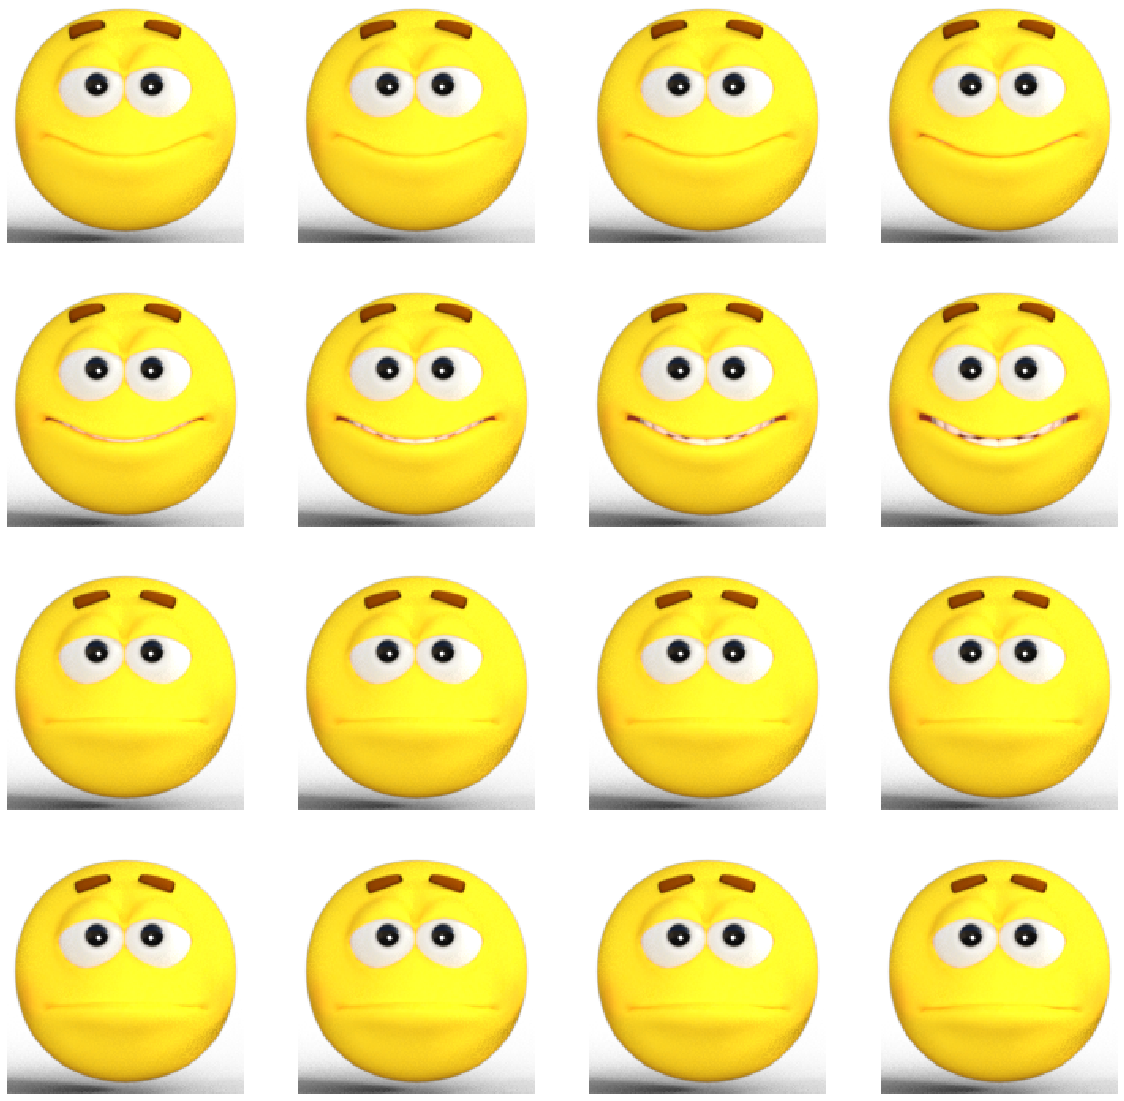

In [73]:
# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 5, nrows * 5)

pic_index += 8
next_horse_pix = [os.path.join(train_happy_dir, fname) 
                for fname in train_happy_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_sad_dir, fname) 
                for fname in train_sad_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

# Defining Model

In [74]:

model=tf.keras.models.Sequential([
        #First Convolution Layer
        tf.keras.layers.Conv2D(16,(2,2),activation='relu',input_shape=(200,200,3)),
        tf.keras.layers.MaxPooling2D(2,2),
        #Second Convolution Layer
        tf.keras.layers.Conv2D(32,(2,2),activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        #Third Convolution Layer
        tf.keras.layers.Conv2D(64,(2,2),activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
   
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256,activation='relu'),
        tf.keras.layers.Dense(512,activation='relu'),
        tf.keras.layers.Dense(1,activation='sigmoid')
        ])
                

In [75]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',optimizer=RMSprop(lr=0.001),metrics=['accuracy'])

In [76]:
# All images will be rescaled by 1./255
train_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory('happy-or-sad/',
                                                  target_size=(200,200),
                                                  batch_size=128,
                                                  class_mode='binary'
                                                    )

Found 80 images belonging to 2 classes.


### Initializing  Callback

In [77]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.999):
            print("\nReached 99.9% accuracy so cancelling training!")
            self.model.stop_training = True

callbacks = myCallback()

In [78]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=16,  
      epochs=15,
      verbose=1,
      callbacks=[callbacks])

Epoch 1/15
16/16 [==============================] - 42s 3s/step - loss: 1.2408 - accuracy: 0.5656
Epoch 2/15
16/16 [==============================] - 43s 3s/step - loss: 0.2714 - accuracy: 0.8766
Epoch 3/15
16/16 [==============================] - 40s 3s/step - loss: 0.0499 - accuracy: 0.9820
Epoch 4/15
15/16 [===========================>..] - ETA: 2s - loss: 0.0049 - accuracy: 1.0000
Reached 99.9% accuracy so cancelling training!
16/16 [==============================] - 42s 3s/step - loss: 0.0047 - accuracy: 1.0000
